<a href="https://colab.research.google.com/github/RerarooM/LGMVIP-DataScience/blob/main/LGM_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Flowers Classification ML Project** - LGM_task1

Dataset: http://archive.ics.uci.edu/ml/datasets/Iris

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
#loading data
print("Importing data...")
df  = pd.read_csv("/content/drive/MyDrive/LGM/Iris.csv")
print("Sucessfully imported.")

Importing data...
Sucessfully imported.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df.head() #to check sucessful importation of dataset.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Analysis**

In [6]:
df.shape #to get no. of rows and column(rows,column)

(150, 6)

In [7]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#description of data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


From the above discription count tells that all the 4 features have 150 rows and from Mean we can say that sepal is larger than petal.

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

we can observe all three classes are equally distributed in terms of the number of counts of each class.

In [10]:
#Create 3 DataFrame for each Species
setosa=df[df['Species']=='Iris-setosa']
versicolor =df[df['Species']=='Iris-versicolor']
virginica =df[df['Species']=='Iris-virginica']

print("SETOSA:\n",setosa.describe())
print("\nVERSICOLOR:\n",versicolor.describe())
print("\nVIRGINICA:\n",virginica.describe())

SETOSA:
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

VERSICOLOR:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.drop(columns=["Id"],axis=1, inplace=True)

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data Visualistion**

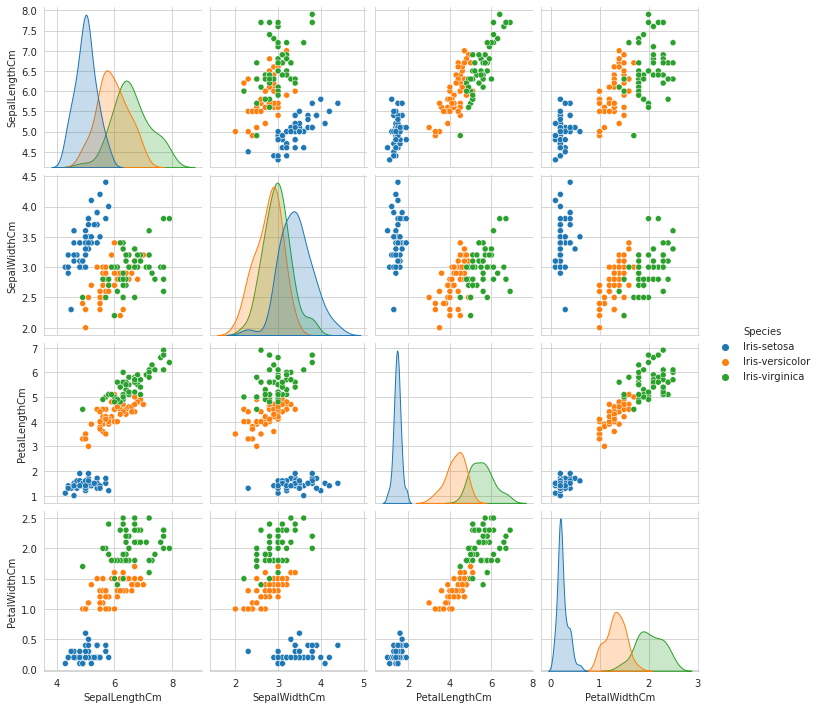

In [14]:
#ploting graph usning seaborn
sns.set_style('whitegrid')
sns.pairplot(data = df, hue='Species')

Scatter Plot - Sepal_Length_Width Vs Species.

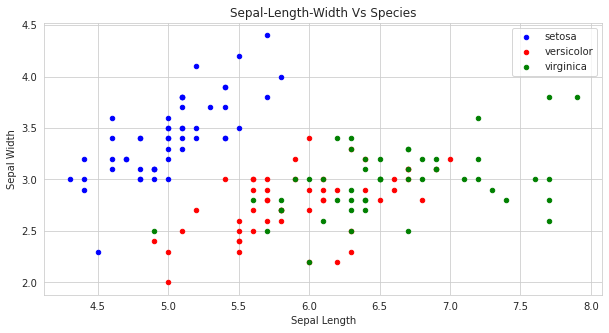

In [15]:
pet_len_wid = df[df.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm'
,color = 'blue', label = 'setosa')
df[df.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'red'
,label = 'versicolor', ax = pet_len_wid)
df[df.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'green'
,label = 'virginica', ax = pet_len_wid)
pet_len_wid.set_xlabel('Sepal Length')
pet_len_wid.set_ylabel('Sepal Width')
pet_len_wid.set_title('Sepal-Length-Width Vs Species')
pet_len_wid = plt.gcf()
pet_len_wid.set_size_inches(10, 5)
plt.show()

Scatter Plot - Petal_Length_Width Vs Species.

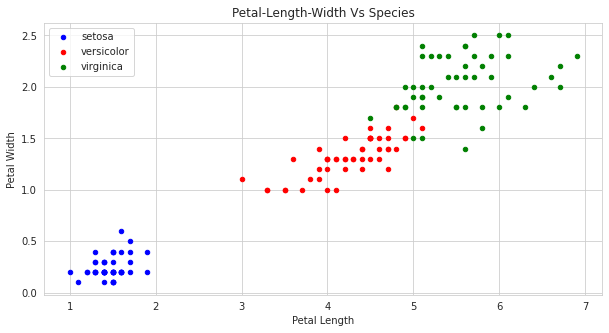

In [16]:
pet_len_wid = df[df.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm'
,color = 'blue', label = 'setosa')
df[df.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'red'
,label = 'versicolor', ax = pet_len_wid)
df[df.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'green'
,label = 'virginica', ax = pet_len_wid)
pet_len_wid.set_xlabel('Petal Length')
pet_len_wid.set_ylabel('Petal Width')
pet_len_wid.set_title('Petal-Length-Width Vs Species')
pet_len_wid = plt.gcf()
pet_len_wid.set_size_inches(10, 5)
plt.show()

**Machine Learning**

In [32]:
#importing required modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier 

Corelation Matrix

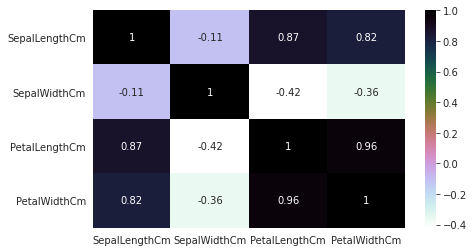

In [23]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

Training the model

In [29]:
X_all = df.iloc[:,:4]
Y_all = df.iloc[:,4] 
print(X_all)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [30]:
print(Y_all)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [37]:

X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.3,random_state=0)
#data is split into train and test
#test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(X_train.shape)
print(X_test.shape)


(105, 4)
(45, 4)


**Logistic Regression**

In [52]:
lR = LogisticRegression()
lR.fit(X_train, Y_train)
prediction=lR.predict(X_test)
#score method to get accuracy of model
score = lR.score(X_test, Y_test)
print(score,"\n\n")
#Confussion Matrix: used to describe the performance of a classification model 
metrics.confusion_matrix(Y_test,prediction)

0.9777777777777777 




array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

**SVM**

In [51]:
model = svm.SVC() 
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
score = model.score(X_test, Y_test)
print(score,"\n\n")
#Confussion Matrix: used to describe the performance of a classification model 
metrics.confusion_matrix(Y_test,prediction)

0.9777777777777777 




array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

**KNN(K-Nearest Neighbours)**

In [55]:
model=KNeighborsClassifier(n_neighbors=3)#this examines 3 neighbours for putting the new data into a class
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
score = model.score(X_test, Y_test)
print(score,"\n\n")
#Confussion Matrix: used to describe the performance of a classification model 
metrics.confusion_matrix(Y_test,prediction)

0.9777777777777777 




array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

**Decission Tree**

In [58]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
score = model.score(X_test, Y_test)
print(score,"\n\n")
#Confussion Matrix: used to describe the performance of a classification model 
metrics.confusion_matrix(Y_test,prediction)

0.9777777777777777 




array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])